In [80]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
import dedalus.public as d3 #wow, I just had to call it dedalus.public
# Had been writing dedalus3 and assuming there were actual errors with jupyter notebook launch
# since it always makes so many complaints
# Well now I'm just going to ignore the remaining jupyter notebook weirdness

In [265]:
df = h5py.File("scratch/checkpoints2/checkpoints2_s3.h5",'r')
df_fields = h5py.File("scratch/fields_two/fields_two_s3.h5",'r')

In [266]:
lnrho = df['tasks/lnrho'][:]

In [267]:
rho_fields = df_fields['tasks/rho'][:]

In [268]:
df['tasks'].keys()

<KeysViewHDF5 ['A', 'T', 'lnrho', 'phi', 'tau_A', 'v']>

In [269]:
rho = np.exp(lnrho)

In [270]:
rho.min()

1.2468088330336274e-05

In [271]:
rho_fields.min()

-2.135752680235223

In [272]:
df['scales/sim_time'][:]

array([0.26090211, 0.26296168, 0.26475183, 0.26631217, 0.26772356,
       0.26901671, 0.270218  , 0.27135471, 0.27243233, 0.27344179])

In [273]:
df['scales/iteration'][:]

array([200, 210, 220, 230, 240, 250, 260, 270, 280, 290])

In [274]:
df_fields['scales/iteration'][:]

array([200, 210, 220, 230, 240, 250, 260, 270, 280, 290])

In [154]:
#with "h5py.file()" as file:
#    file.(whatever)
#    data = file['tasks/...'']
# last line in with grouping closes file

In [261]:
# Some toying around to figure out what x and xVal are, and r

r = 1
length = 10
nx = 32 #formerly 32 x 32 x 160? Current plan is 64 x 64 x 320 or 640
ny = 32
nz = 160
mesh = None
coords = d3.CartesianCoordinates('x', 'y','z')
dist = d3.Distributor(coords, dtype=np.float64, mesh = mesh)
xbasis = d3.RealFourier(coords['x'], size=nx, bounds=(-r, r))
ybasis = d3.RealFourier(coords['y'], size=ny, bounds=(-r, r))
zbasis = d3.RealFourier(coords['z'], size=nz, bounds=(0, length))
x,y,z = dist.local_grids(xbasis,ybasis,zbasis)

p = 0
radmax = 0
# print(x) # prints triple array with single list singleton lists of -1 to  0.9375, 32 elts
# print(z) # similar, 160 elts, from 0 to 9.9375
# print(xbasis)
# print([[i,0,0] for i in range(x.shape[0])]) # prints list of [0,0,0] thru to [31,0,0]
#print(x.shape[0], x.shape[1], x.shape[2]) #prints 32, 1, 1
# print(z.shape[0], z.shape[1], z.shape[2]) #prints 1, 1, 160
# print(x[-1,0,0])
# print(type(x)) # class 'numpy.ndarray' (3D)
# print(x)
# print(type([1,0,0])) # class list (duh)
# print(x[1,0,0]) #prints -0.9375 - must be 
#y = np.ndarray
#y = [[[0]],[[1]],[[2]]] # not how instantiating a numpy array works
# print(y)
#y = x
#print(x)
# print("y mult is", y[1,0,0])
# print("x mult is", x[1,0,0])
#print(x)
#print(y)
#print(z)
for i in range(x.shape[0]):
    xVal = x[i,0,0]
    # print("xval is", xVal)
    for j in range(y.shape[1]):
        yVal = y[0,j,0]
        # print("yVal is", yVal)
        for k in range(z.shape[2]):
            zVal = z[0,0,k]
            rad = np.sqrt(xVal**2 + yVal**2)
            p += 1
            if p % 1000 == 0:
                # print("xVal is", xVal)
                # print("x is", x)
                # print("[i,0,0] is", [i,0,0])
                # print("yVal is", yVal)
                # print("zVal is", zVal) # single number from 0 to 10
                # print("z is", z) # full 160 list
                print("rad is", rad)
                print("radmax is", radmax)
            radmax = max(rad, radmax)

rad is 1.1792476415070754
radmax is 1.4142135623730951
rad is 1.0307764064044151
radmax is 1.4142135623730951
rad is 1.0077822185373186
radmax is 1.4142135623730951
rad is 1.118033988749895
radmax is 1.4142135623730951
rad is 1.3707320124663318
radmax is 1.4142135623730951
rad is 1.1625672023586422
radmax is 1.4142135623730951
rad is 0.9882117688026186
radmax is 1.4142135623730951
rad is 0.9395810236483068
radmax is 1.4142135623730951
rad is 1.0625
radmax is 1.4142135623730951
rad is 1.2823927830426993
radmax is 1.4142135623730951
rad is 1.1524430571616109
radmax is 1.4142135623730951
rad is 0.9519716382329886
radmax is 1.4142135623730951
rad is 0.8772293029761374
radmax is 1.4142135623730951
rad is 0.978279740156158
radmax is 1.4142135623730951
rad is 1.194060823408925
radmax is 1.4142135623730951
rad is 1.1490485194281397
radmax is 1.4142135623730951
rad is 0.8948638164547721
radmax is 1.4142135623730951
rad is 0.8125
radmax is 1.4142135623730951
rad is 0.894863816454772
radmax is 1.

In [275]:
Density = df['tasks/lnrho'][9,:,:,:]

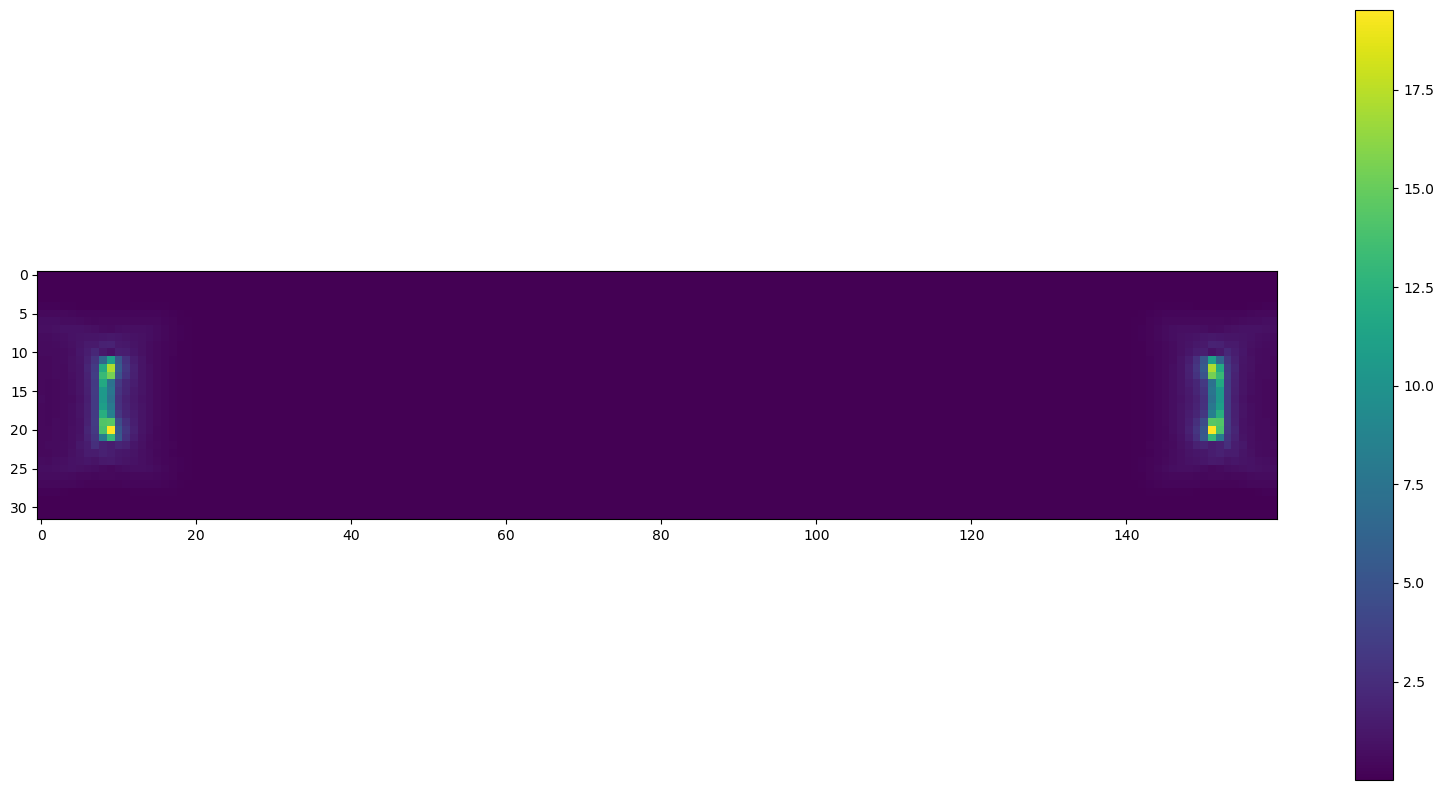

In [279]:
plt.figure(figsize=(20,10)) #make larger
plt.imshow(np.exp(Density[:,5,:])) #vmax = 0.01
plt.colorbar()

In [280]:
Temp = df['tasks/T'][1,:,:,:]

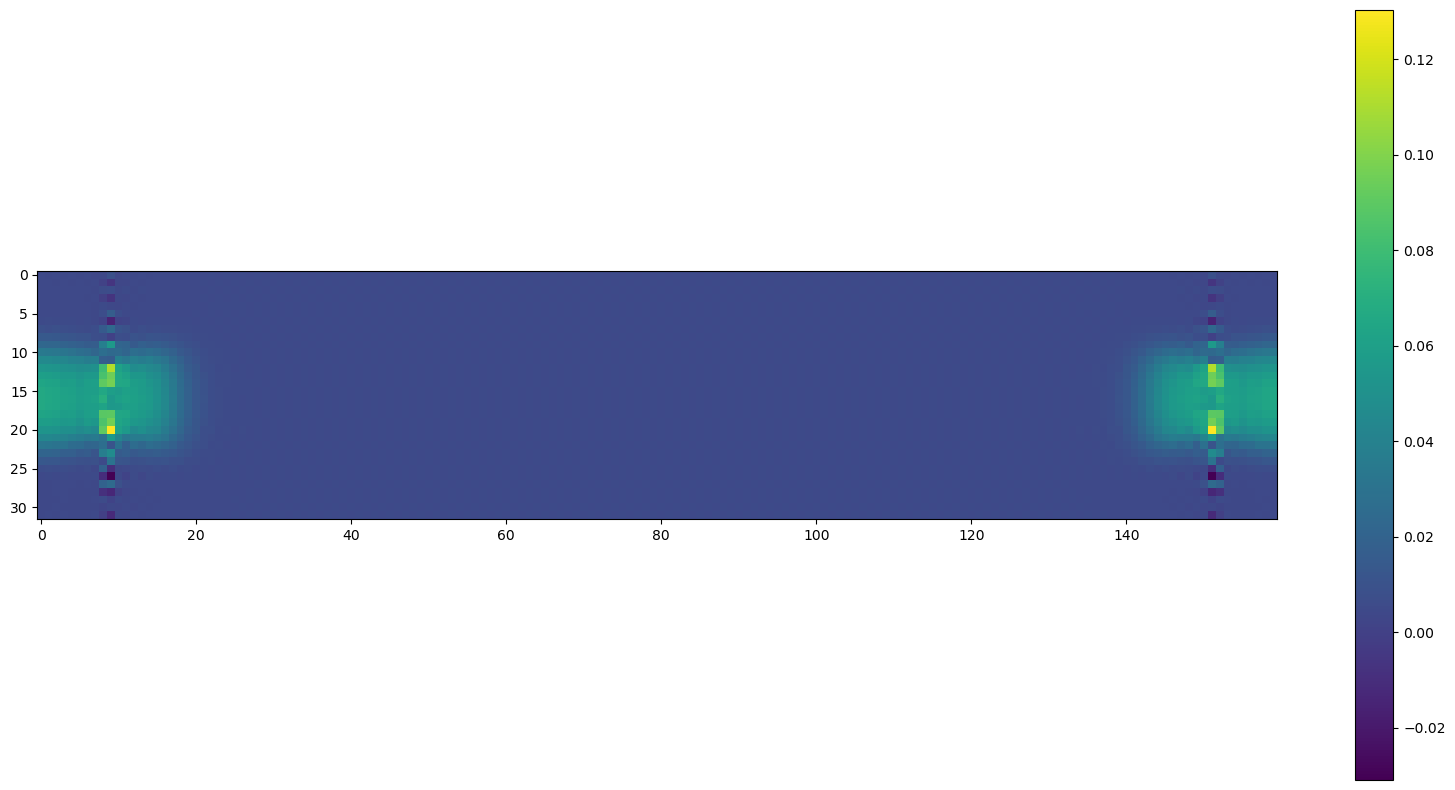

In [290]:
plt.figure(figsize=(20,10)) #make larger
plt.imshow(Temp[:,0,:]) #vmax = 0.01
plt.colorbar()

In [133]:
np.exp(Density).min()

0.007560405778082576

In [134]:
np.exp(Density).argmin() #turn this into 3D index - unravel, then slice in one of those directions to see plane where min is

33280

In [135]:
T_fields = df_fields['tasks/T'][:]
T_fields.min()

-0.013394393850158778

In [136]:
T = df['tasks/T'][:]
T.min()

-0.028116624073539598

In [137]:
rho_fields.min()

-0.7194252063844384

In [283]:
df.close()
df_fields.close()